In [13]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\Excel files\bank.csv")   # make sure the file path is correct
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (11162, 17)
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [15]:
# Step 3: Encode the target variable (deposit: yes=1, no=0)
df["deposit"] = df["deposit"].map({"yes": 1, "no": 0})

In [16]:
# Step 4: Convert categorical features to numerical (One-Hot Encoding)
df_encoded = pd.get_dummies(df.drop("deposit", axis=1), drop_first=True)

# Features (X) and Target (y)
X = df_encoded
y = df["deposit"]

In [17]:
# Step 5: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [18]:
# Step 6: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [19]:
# Step 7: Make predictions
y_pred = clf.predict(X_test)

In [20]:
# Step 8: Evaluate model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8053150194087787

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1762
           1       0.80      0.79      0.79      1587

    accuracy                           0.81      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.81      0.81      0.81      3349



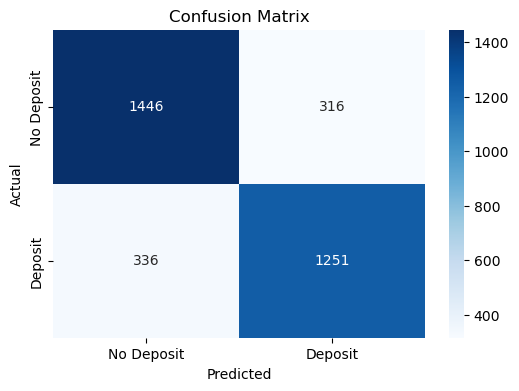

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No Deposit","Deposit"],
            yticklabels=["No Deposit","Deposit"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

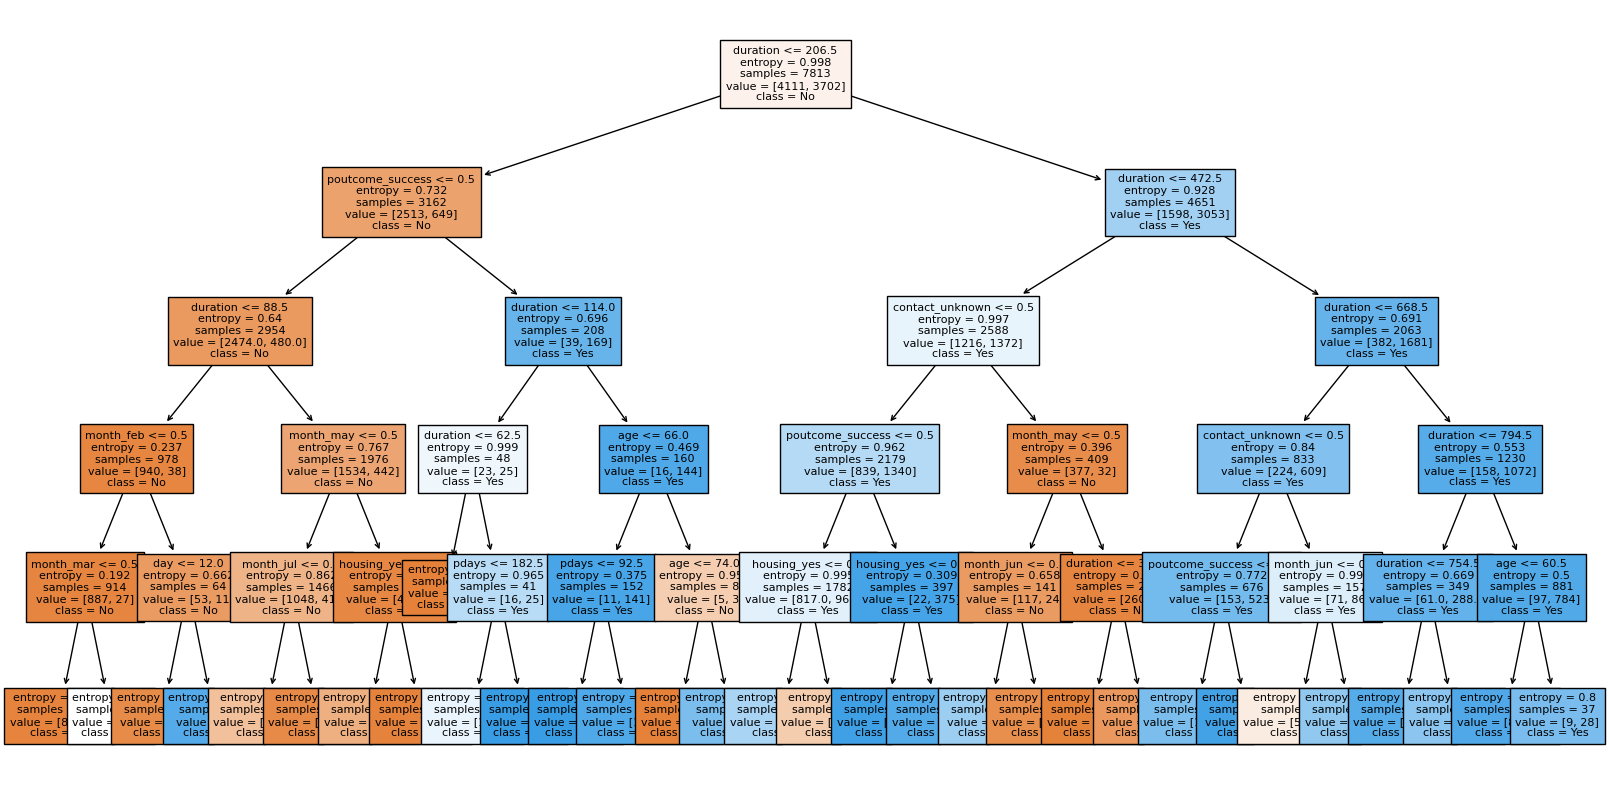

In [22]:
# Step 9: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No","Yes"],
          filled=True, fontsize=8)
plt.show()